ModuleNotFoundError: No module named 'pyLDAvis'

In [2]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.8 MB/s eta 0:00:00


In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.datasets import fetch_20newsgroups
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
import numpy as np

In [4]:
# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# Text Preprocessing
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [token for token in tokens if token.isalpha()]  # Remove punctuation
    tokens = [token for token in tokens if token not in stopwords.words('english')]  # Remove stopwords
    return tokens

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:

preprocessed_documents = [preprocess_text(doc) for doc in documents]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Create a dictionary and a corpus
dictionary = corpora.Dictionary(preprocessed_documents)
corpus = [dictionary.doc2bow(doc) for doc in preprocessed_documents]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Print the topics found by the LDA model
print("LDA Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}")

LDA Topics:
Topic: 0 
Words: 0.011*"space" + 0.004*"center" + 0.004*"new" + 0.004*"earth" + 0.004*"nasa" + 0.004*"also" + 0.004*"launch" + 0.004*"april" + 0.003*"may" + 0.003*"university"
Topic: 1 
Words: 0.016*"team" + 0.012*"game" + 0.011*"games" + 0.009*"play" + 0.009*"year" + 0.008*"season" + 0.007*"league" + 0.007*"gm" + 0.007*"nhl" + 0.006*"win"
Topic: 2 
Words: 0.008*"get" + 0.007*"would" + 0.007*"one" + 0.007*"use" + 0.006*"like" + 0.006*"know" + 0.005*"anyone" + 0.005*"thanks" + 0.005*"also" + 0.005*"windows"
Topic: 3 
Words: 0.038*"p" + 0.038*"x" + 0.034*"r" + 0.034*"q" + 0.033*"g" + 0.031*"max" + 0.030*"n" + 0.026*"c" + 0.025*"w" + 0.025*"b"
Topic: 4 
Words: 0.018*"card" + 0.007*"system" + 0.007*"bus" + 0.007*"dos" + 0.006*"scsi" + 0.006*"cards" + 0.006*"controller" + 0.006*"drivers" + 0.005*"windows" + 0.005*"ide"
Topic: 5 
Words: 0.009*"would" + 0.007*"one" + 0.006*"people" + 0.005*"use" + 0.004*"may" + 0.004*"government" + 0.003*"could" + 0.003*"also" + 0.003*"like" + 0.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Prepare the visualization
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)

In [11]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare the LDA visualization data
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualization inline in the notebook
pyLDAvis.display(lda_display)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Train Word2Vec model on the preprocessed documents
word2vec_model = Word2Vec(sentences=preprocessed_documents, vector_size=100, window=5, min_count=5, workers=4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# Represent each document as the average of word vectors
def document_vector(doc):
    # Remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.wv.index_to_key]
    if len(doc) > 0:
        return np.mean(word2vec_model.wv[doc], axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# Get vectors for each document
doc_vectors = [document_vector(doc) for doc in preprocessed_documents]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# Calculate cosine similarity between document vectors
cosine_similarities = cosine_similarity(doc_vectors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# Cluster documents using KMeans
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(doc_vectors)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
# Get vectors for each document
doc_vectors = [document_vector(doc) for doc in preprocessed_documents]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


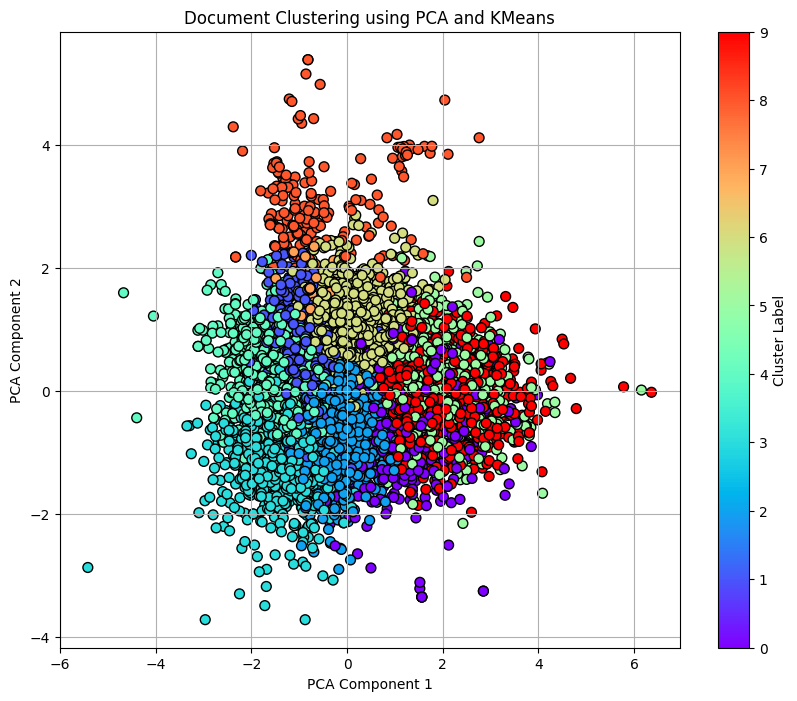

In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'doc_vectors' contains the document vectors and 'labels' contains the cluster labels
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(doc_vectors)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=labels, cmap='rainbow', edgecolor='k', s=50)
plt.title('Document Clustering using PCA and KMeans')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


In [24]:
# Comparison of document similarity using LDA-based vectors
lda_doc_vectors = [lda_model.get_document_topics(bow, minimum_probability=0.0) for bow in corpus]
lda_doc_vectors = [[prob for topic, prob in doc] for doc in lda_doc_vectors]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# Remove any empty vectors
lda_doc_vectors = np.array([vec for vec in lda_doc_vectors if vec])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# Calculate cosine similarity for LDA-based vectors
lda_cosine_similarities = cosine_similarity(lda_doc_vectors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
print("\nCosine Similarity using LDA-based Vectors:")
print(lda_cosine_similarities)


Cosine Similarity using LDA-based Vectors:
[[1.0000001  0.13605744 0.15675884 ... 0.00458027 0.6911768  0.32098287]
 [0.13605744 1.         0.02899926 ... 0.07055308 0.10897415 0.10163195]
 [0.15675884 0.02899926 1.         ... 0.00450642 0.28355432 0.1610701 ]
 ...
 [0.00458027 0.07055308 0.00450642 ... 1.         0.01057337 0.86201495]
 [0.6911768  0.10897415 0.28355432 ... 0.01057337 0.99999994 0.47186327]
 [0.32098287 0.10163195 0.1610701  ... 0.86201495 0.47186327 0.99999994]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
